In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import os

from collections import defaultdict
import cv2

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.6f}'.format

import gym
from gym.wrappers import Monitor
import gym_ple

env = gym.make('FlappyBird-v0')

couldn't import doomish
Couldn't import doom
WARN: Environment '<class 'gym_ple.ple_env.PLEEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


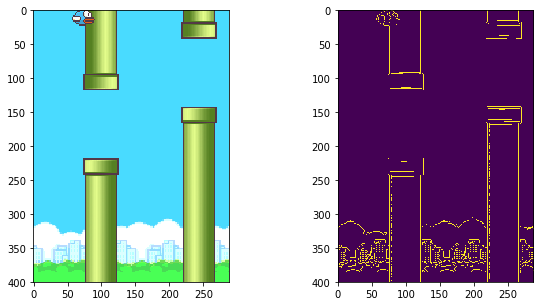

In [35]:
image = s[:-112]
edges = cv2.Canny(image, 100, 100)

draw_image(image, edges)

2018-06-25 21:17:02,263 Layers 3, features 16, filter size 3x3, pool size: 2x2


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-06-25 21:17:03,349 Restoring parameters from ./unet_trained/model.ckpt
2018-06-25 21:17:03,385 Model restored from file: ./unet_trained/model.ckpt


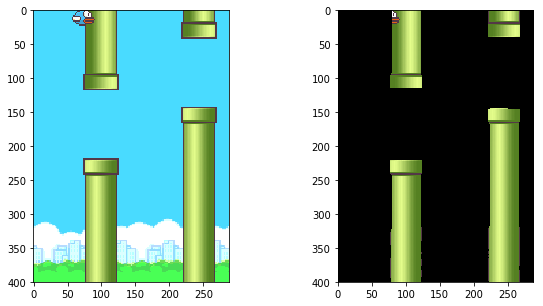

In [34]:
from croppers import GrabCutCropper, SemanticSegmentationCropper

def draw_image(image, image_cut):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))    
    ax1.imshow(image)
    ax2.imshow(image_cut)

init_state = env.reset()

for _ in range(70):
    s, r, done, _ = env.step(env.action_space.sample())

image = s[:-112]
ssc = SemanticSegmentationCropper("./unet_trained/model.ckpt")
cropped = ssc.crop_image(image)
draw_image(image, cropped)

CPU times: user 3 s, sys: 562 ms, total: 3.56 s
Wall time: 1.37 s


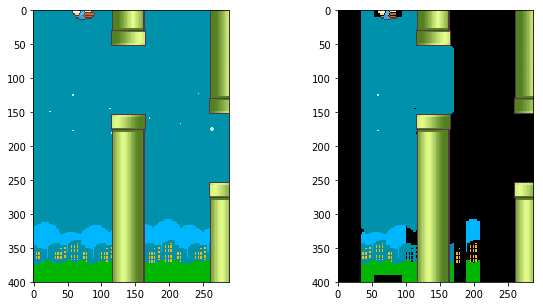

In [3]:
%%time

image = s[:-112]
gcc = GrabCutCropper()
cropped = gcc.crop_image(image)
draw_image(image, cropped)